# Plotting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/3cYy56H.png" width="350px"/></td>
<td><img src="https://i.imgur.com/V9jAreo.png" width="350px"/></td>
<td><img src="https://i.imgur.com/5a6dwtm.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ZSsHzrA.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Count (Bar) Plot</td>
<td style="font-weight:bold; font-size:16px;">KDE Plot</td>
<td style="font-weight:bold; font-size:16px;">Joint (Hex) Plot</td>
<td style="font-weight:bold; font-size:16px;">Violin Plot</td>
</tr>
<tr>
<td>sns.countplot()</td>
<td>sns.kdeplot()</td>
<td>sns.jointplot()</td>
<td>sns.violinplot()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>Good for interval data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval data and some nominal categorical data.</td>
</tr>
</table>

In [6]:
import pandas as pd
reviews = pd.read_csv("../pandas/winemag-data-130k-v2.csv", index_col=0)
import seaborn as sns
pd.set_option('max_rows', 5)

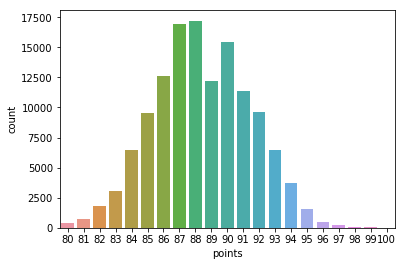

In [3]:
sns.countplot(reviews.points)

## KDE Plot

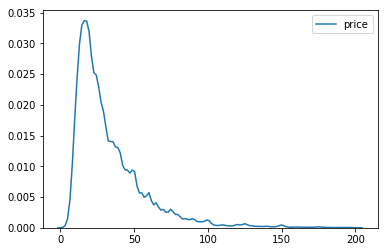

In [4]:
sns.kdeplot(reviews.query('price < 200').price)

In [7]:
reviews.query('price < 200').price

1         15.0
2         14.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 120199, dtype: float64

In [8]:
reviews[reviews['price'] < 200].price

1         15.0
2         14.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 120199, dtype: float64

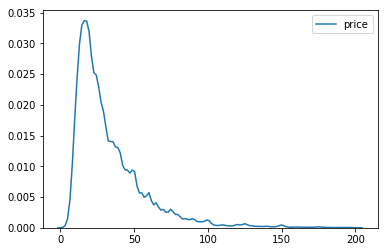

In [9]:
sns.kdeplot(reviews[reviews['price'] < 200].price)

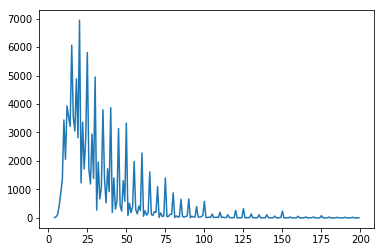

In [12]:
reviews[reviews['price'] < 200].price.value_counts().sort_index().plot.line()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


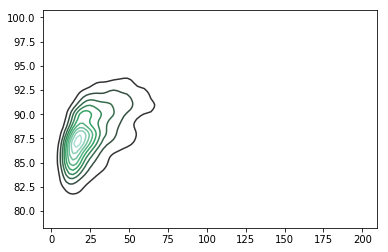

In [15]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

## Distplot

The `seaborn` equivalent to a `pandas` histogram is the `distplot`. Here's an example:

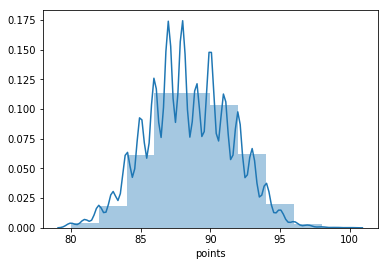

In [16]:
sns.distplot(reviews['points'],bins = 10)

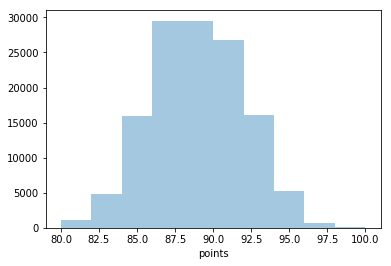

In [17]:
sns.distplot(reviews['points'],bins = 10,kde=False)

## Scatterplot and hexplot

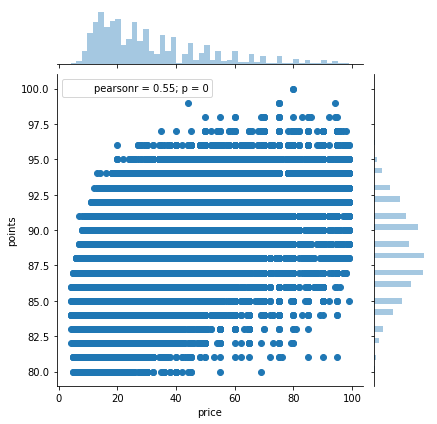

In [18]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

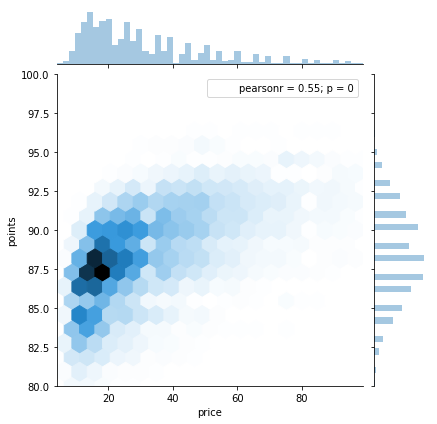

In [19]:
sns.jointplot(x='price',y='points',data = reviews.query('price < 100'),kind='hex',gridsize=20)

## Boxplot and violin plot

In [20]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation


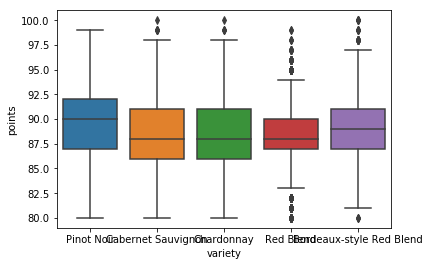

In [21]:
sns.boxplot(
    x='variety',
    y='points',
    data=df
)

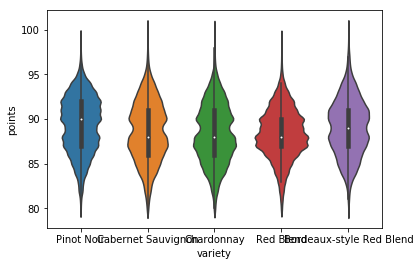

In [22]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

In [23]:
pokemon = pd.read_csv("Pokemon_1.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


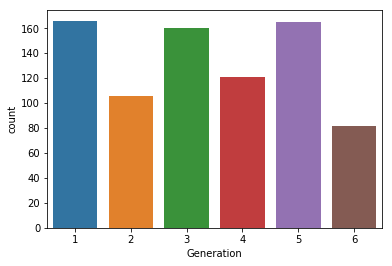

In [24]:
sns.countplot(pokemon.Generation)

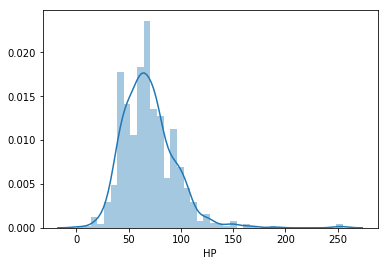

In [25]:
sns.distplot(pokemon.HP)

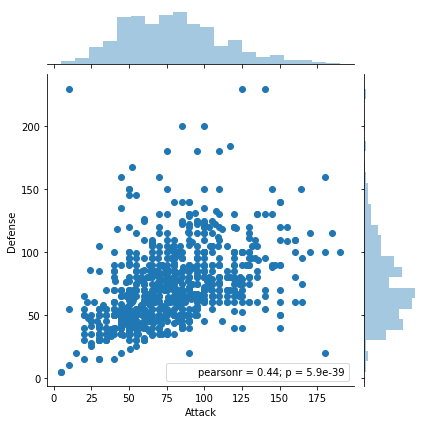

In [26]:
#sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
sns.jointplot(x='Attack',y='Defense',data=pokemon)

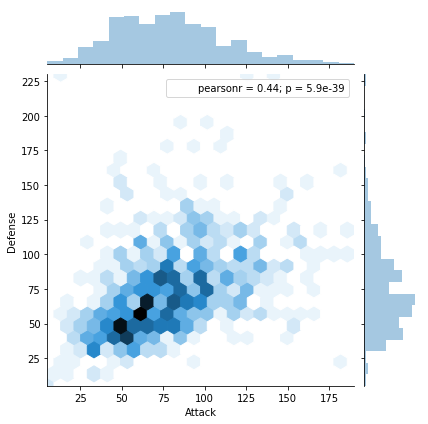

In [27]:
sns.jointplot(x='Attack',y='Defense',data=pokemon,kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


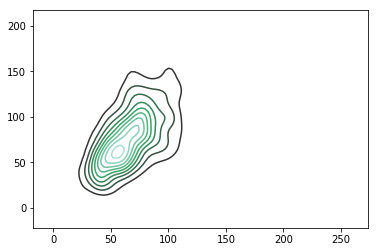

In [28]:
sns.kdeplot(pokemon.loc[:,['HP','Attack']])

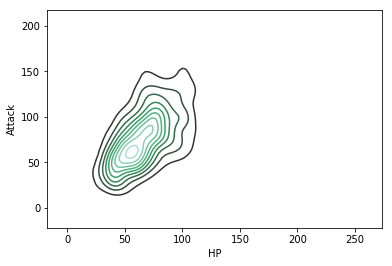

In [29]:
sns.kdeplot(pokemon['HP'], pokemon['Attack'])

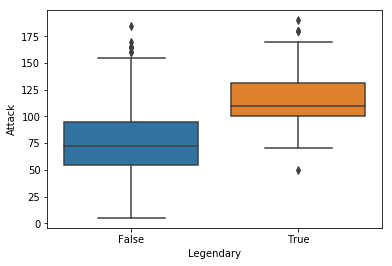

In [30]:
sns.boxplot(x='Legendary',y='Attack',data=pokemon)

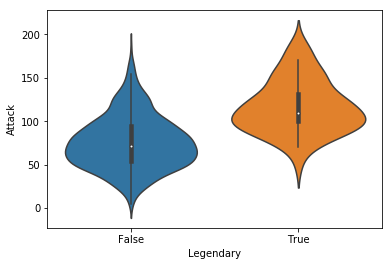

In [32]:
sns.violinplot(x='Legendary',y='Attack',data=pokemon)

In [ ]:
end